In [ ]:
""" 
2/9/24 - Extracting substrokes from dataset, and then creating "fake" dataset holding substrokes instad of strokes.
In prepf ro nerual analysis.
"""


In [1]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# %cd ..
# from tools.utils import * 
# from tools.plots import *
# from tools.analy import *
# from tools.calc import *
# from tools.analyplot import *
# from tools.preprocess import *
# from tools.dayanalysis import *

from pythonlib.drawmodel.analysis import *
from pythonlib.tools.stroketools import *
import pythonlib
from pythonlib.dataset.dataset import load_dataset_notdaily_helper, load_dataset_daily_helper
import pickle
import seaborn as sns
import os
import seaborn as sns
import matplotlib.pyplot as plt

##### Try loading a single dataset

In [3]:
import pythonlib.globals


Searching using this string:
/home/lucast4/code/drawmonkey/expt_metadat/*220718-*Pancho.**
Found this many paths:
0
Searching using this string:
/home/lucast4/code/drawmonkey/expt_metadat_daily/*220718-*Pancho.**
Found this many paths:
1
---
/home/lucast4/code/drawmonkey/expt_metadat_daily/priminvar3d-220718-Pancho.yaml
Loading this dataset Pancho priminvar3d 220718
Searching using this string:
/gorilla1/analyses/database/*Pancho-*priminvar3d-*220718-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/gorilla1/analyses/database/BEH/*Pancho-*priminvar3d-*220718-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
1
---
/gorilla1/analyses/database/BEH/Pancho-priminvar3d-220718-230215_165517
Searching using this string:
/mnt/Freiwald_kgupta/kgupta/analyses/database/*Pancho-*priminvar3d-*220718-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/mnt/Freiwald_kgupta/kgupta/analyses/da

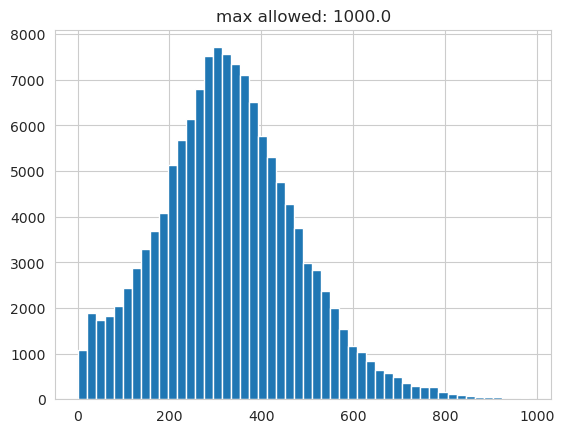

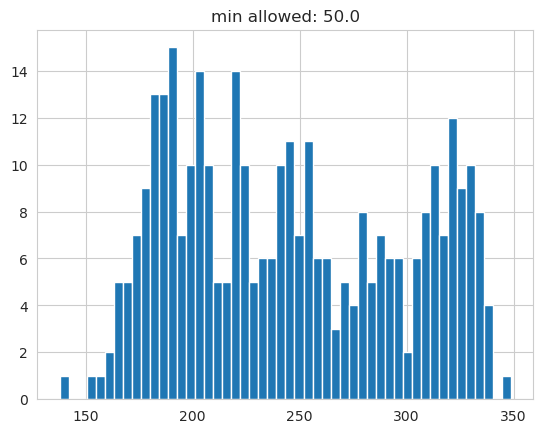

In [9]:
# Load a daily dataset

# animal = "Diego"
# DATE = "230619"

animal = "Pancho"
DATE = "220718"

# animal = "Pancho"
# DATE = "231116"

D = load_dataset_daily_helper(animal, DATE)

#####

# Preprocess - smoothing strokes better for Diego

In [11]:
list_strokes_filt = D.strokes_smooth_preprocess(window_time=0.35)
D.Dat["strokes_beh"] = list_strokes_filt

In [ ]:
fig, axes, idxs = D.plotMultTrials2(20)

In [ ]:
list_strokes = D.Dat.iloc[idxs]["strokes_beh"]
D.plotMultStrokes(list_strokes, titles=idxs);
# D.plot_strokes(strokes)

In [ ]:
list_strokes = D.Dat.iloc[idxs]["strokes_beh"]
D.plotMultStrokes(list_strokes, titles=idxs);
# D.plot_strokes(strokes)

In [ ]:
strokes = D.Dat.iloc[282]["strokes_beh"]


In [ ]:
fs = D.get_sample_rate_alltrials()

In [ ]:
1000/10

In [ ]:
from pythonlib.drawmodel.strokePlots import plotDatStrokesWrapper

In [ ]:
from pythonlib.tools.stroketools import strokesFilter, smoothStrokes

# Apply smoothnig

# do smoothing
# window_type = "flat"
window_type = "hanning"
adapt_win_len="adapt"

strokes_filt = smoothStrokes(strokes, fs, 
    window_time=0.1, window_type=window_type,
         adapt_win_len=adapt_win_len)

fig, axes = plt.subplots(2,2)

ax = axes.flatten()[0]

from pythonlib.drawmodel.strokePlots import plotDatStrokesTimecourse
ax = axes.flatten()[0]
plotDatStrokesTimecourse(strokes, ax=ax)
ax = axes.flatten()[1]
plotDatStrokesTimecourse(strokes_filt, ax=ax)
ax.set_title("strokesFilter() --> Filtered")

ax = axes.flatten()[2]
plotDatStrokesWrapper(strokes, ax)

ax = axes.flatten()[3]
plotDatStrokesWrapper(strokes_filt, ax)

# Find velocity

strokesVelocity(strokes, fs, True, clean=True);
strokesVelocity(strokes_filt, fs, True, clean=True);



In [ ]:
filt_hi=8

strokes_filt = strokesFilter(strokes, [None, filt_hi], fs, plotprepost=True, plotprepost_xy=True, DEBUG=True)

fig, axes = plt.subplots(2,2)

ax = axes.flatten()[0]

from pythonlib.drawmodel.strokePlots import plotDatStrokesTimecourse
ax = axes.flatten()[0]
plotDatStrokesTimecourse(strokes, ax=ax)
ax = axes.flatten()[1]
plotDatStrokesTimecourse(strokes_filt, ax=ax)
ax.set_title("strokesFilter() --> Filtered")

ax = axes.flatten()[2]
plotDatStrokesWrapper(strokes, ax)

ax = axes.flatten()[3]
plotDatStrokesWrapper(strokes_filt, ax)


In [ ]:
# Find velocity

strokesVelocity(strokes, fs, True, clean=True);
strokesVelocity(strokes_filt, fs, True, clean=True);



In [ ]:
strokesVelocity


##### Smoothing all strokes in dataset

In [ ]:
# 1) General preprocessing, smoothing
from pythonlib.tools.stroketools import strokesFilter, smoothStrokes

list_strokes = D.Dat["strokes_beh"]

# do smoothing
# window_type = "flat"
window_type = "hanning"
adapt_win_len="adapt"

window_time = 0.15 # do in general;
window_time = 0.3 # substrokes


for strokes in list_strokes:    
    strokes_filt = smoothStrokes(strokes, fs, 
        window_time=window_time, window_type=window_type,
             adapt_win_len=adapt_win_len)
        


# Splitting strokes into substrokes

In [ ]:
from pythonlib.dataset.dataset_strokes import preprocess_dataset_to_datstrokes
DS = preprocess_dataset_to_datstrokes(D, "clean_one_to_one")


In [ ]:
# NOTE: methods to find "average" time series in space of DTW. basically what I am doing.
# https://www.sciencedirect.com/science/article/pii/S003132031000453X

In [ ]:
# Idea: a variation of DatStrokes, which uses actually substrokes


In [ ]:
# Approach - For a given stroke kind, Get median vel profile
# DTW each trial to that template trial.

# Segment each stroke using their alignement positsions. 


In [ ]:
# Cluster the substrokes

In [ ]:
# Each substroke has a label (shape, substroke index in shape, substroke cluster)

# Run all analyses on these substrokes as you would.

##### Helper, plot, to decide what window to use

In [ ]:
from pythonlib.dataset.substrokes import pipeline_wrapper, database_shape_segmentation_help_decide_values, database_shape_segmentation_get, _convert_inds_to_frac




In [ ]:
# Then convert indices (out of 50) tofracs within stroke

# Enter it by hand here
Npts = 70
_convert_inds_to_frac([15, 33], Npts)


In [ ]:
database_shape_segmentation = database_shape_segmentation_get(animal)

# First, go thru each shape and check if exists
list_shapes = DS.Dat["shape"].unique().tolist()
for shape in list_shapes:
    if shape not in database_shape_segmentation:
        database_shape_segmentation_help_decide_values(DS, shape, Npts)
        assert False, "FIX THIS SHAPE"

# Run main data collection

SAVING at:  /gorilla1/analyses/main/substrokes_preprocess/Pancho_220718_priminvar3d
SMOOTHING STROKES, to preprocess
*** RUNNING D.preprocessGood using these params:
['beh_strokes_at_least_one', 'one_to_one_beh_task_strokes_allow_unfinished', 'no_supervision']
-- Len of D, before applying this param: beh_strokes_at_least_one, ... 336
after: 336
-- Len of D, before applying this param: one_to_one_beh_task_strokes_allow_unfinished, ... 336
after: 335
-- Len of D, before applying this param: no_supervision, ... 335
after: 335
Removing these trials: 
[]
self.Dat starting legnth:  335
Modified self.Dat, keeping only the inputted inds
self.Dat final legnth:  335
Success! all gridloc identical!
These are the x and y mappings, gridloc:loc
x... {0: 0.05}
y... {0: 0.05}
0
100
200
300
This many strokes extracted:  335
Appended epoch to self.Dat
Appended character to self.Dat
DONE!
Added column: dist_beh_task_strok
clean_preprocess_data...
len of DS.Dat = 335, before running... stroke_too_short
Do


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x7f63e7c63b80> (for post_execute):



KeyboardInterrupt



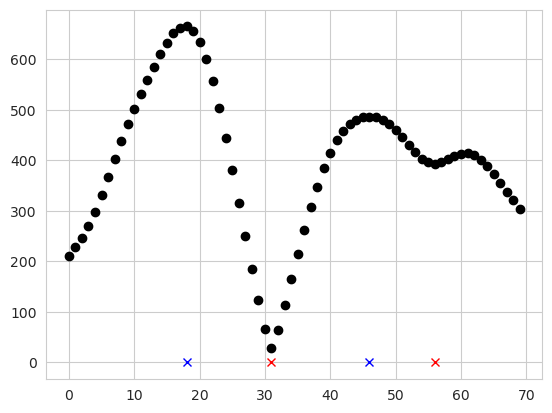

Error in callback <function flush_figures at 0x7f63e74f2c10> (for post_execute):



KeyboardInterrupt



In [12]:
from pythonlib.dataset.substrokes import pipeline_wrapper
Dsubs, DSsubs, SAVEDIR = pipeline_wrapper(D)

In [ ]:
Dsubs.Dat.loc[:, ["trialcode", "strokes_beh"]][:10]

##### Save the extracted substrokes

In [ ]:
# OK --> incorperated into pipeline already

In [ ]:
pathdir = f"{SAVEDIR}"
# pathdir = 
DSsubs.export_dat(SAVEDIR)
Dsubs.save(SAVEDIR, ["trialcode", "strokes_beh"])
DS.save("/tmp", ["trialcode", "strokes_beh"])
len(Dsubs.Dat)
len(DS.Dataset.Dat)

DS.Dataset.Dat[:2]

# Load extracted substrokes

In [ ]:
from pythonlib.dataset.substrokes import load_presaved_using_pipeline
animal = "Diego"
date = 230616
D = load_dataset_daily_helper(animal, date)
DSsubs, Dsubb = load_presaved_using_pipeline(D)
